This Notebook Explores the Two Datasets used in this Project. The Brushstroke Dataset & the Training Image Dataset

In [42]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision import models, transforms
from torch.utils.data import TensorDataset, DataLoader, RandomSampler

In [3]:
# download dataset from google drive

# install gdown if not installed
!pip install gdown

# create a data folder, download data into it
!mkdir brushstroke_data; cd brushstroke_data; gdown https://drive.google.com/uc?id=1Fl9K6XbDr_5lOb0J-lzjPX9SoJ9M7j1x

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
mkdir: cannot create directory ‘brushstroke_data’: File exists
Downloading...
From: https://drive.google.com/uc?id=1Fl9K6XbDr_5lOb0J-lzjPX9SoJ9M7j1x
To: /home/snowballfight/PycharmProjects/Brushstroke_GAN_Flask_Project/brushstroke_data/episodes_42.npz
71.1MB [02:09, 503kB/s] ^C
Traceback (most recent call last):
  File "/home/snowballfight/anaconda3/envs/pytorchenv/bin/gdown", line 10, in <module>
    sys.exit(main())
  File "/home/snowballfight/anaconda3/envs/pytorchenv/lib/python3.7/site-packages/gdown/cli.py", line 66, in main
    download(url=url, output=args.output, quiet=args.quiet)
  File "/home/snowballfight/anaconda3/envs/pytorchenv/lib/python3.7/site-packages/gdown/download.py", line 106, in download
    for chunk in res.iter_content(chunk_size=CHUNK_SIZE):
  File "/home/snowballfight/anaconda3/envs/pytorchenv/lib/python3.7/site-packages/requests/models.py", line 750, in generate
 

In [8]:
#load brushstroke data into memory
data = np.load('brushstroke_data/' + 'episodes_42.npz')
stroke_data = data['strokes']
action_data = data['actions']

In [15]:
# explore action data
print(f'The dataset contains: {action_data.shape[0]} examples of brushstroke actions')
print(f'Each example contains: {action_data.shape[1]} parameters for a single brushstroke')
print(f'Example of a single actions parameters: {action_data[0]}')

# each action vector contains 12 parameters for a single brushstroke
# these parameters consist of - Start and End Pressure (param 1,2)
#                             - Brush Size Radius (param 3)
#                             - RGB Color (param 4,5,6)
#                             - Brush Coordinates, Start, End, Intermediate (param (7,8),(9,10),(11,12))

The dataset contains: 100000 examples of brushstroke actions
Each example contains: 12 parameters for a single brushstroke
Example of a single actions parameters: [0.33052152 0.24929554 0.63813394 0.6562682  0.53990434 0.43563418
 0.62354892 0.49426813 0.38073039 0.89612729 0.92475446 0.46671069]


This dataset contains 100000 strokes
Each stroke contains 64 by 64 pixels and 3 color channels


<function matplotlib.pyplot.show(*args, **kw)>

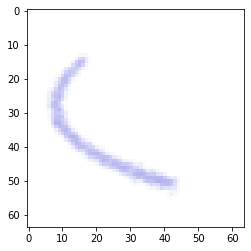

In [21]:
# visualize stroke data
# total number of strokes in dataset
print(f'This dataset contains {stroke_data.shape[0]} strokes')
print(f'Each stroke contains {stroke_data.shape[1]} by {stroke_data.shape[2]} pixels and {stroke_data.shape[3]} color channels')

# visualizing a stroke in dataset
example_stroke = stroke_data[5][:,:]
plt.grid(False)
plt.imshow(example_stroke, cmap='Greys')
plt.show

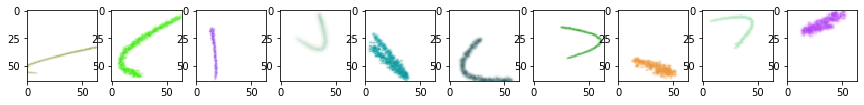

In [35]:
# visualizing multiple strokes in dataset
num_strokes = 10
random_sample = np.random.choice(stroke_data.shape[0], num_strokes)
stroke_subset = []

# take a random sample of num_strokes strokes
for i in random_sample:
    stroke_subset.append(stroke_data[i])

# plot the brushstrokes
fig = plt.figure(figsize=(30, 10))

i=0
for stroke in stroke_subset:
    i += 1
    fig.add_subplot(1, 20, i+1)
    plt.grid(False)
    plt.imshow(stroke)
    
plt.show()    

In [43]:
# explore Image Dataset

# batch size
batch_size = 1
root = 'painting_data'

# transform
transform = transforms.Compose([
        transforms.Resize(64),
        transforms.CenterCrop(64),
        transforms.ToTensor(),
        ])

# create dataset from images in ImageFolder
data = torchvision.datasets.ImageFolder(root=root, transform=transform)

#create sampler
sampler = RandomSampler(data, replacement=True, num_samples=100)

# create dataloader for data
dataloader = torch.utils.data.DataLoader(data, batch_size = batch_size, sampler=sampler)

In [50]:
# print out info on data and dataloader
print(f'There are {len(data)} images in this dataset')
print(f'We have taken a sample of {len(dataloader)} images from this dataset')

There are 8683 images in this dataset
We have taken a sample of 100 images from this dataset


torch.Size([1, 3, 64, 64])


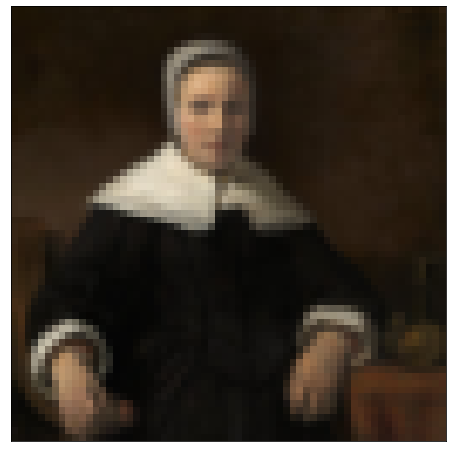

In [51]:
# visualizing single image from dataset

def imshow(imgs):
    imgs = torchvision.utils.make_grid(imgs)
    npimgs = imgs.numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(npimgs, (1,2,0)), cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])
    plt.show
    
dataIter = iter(dataloader)

imgs, labels = dataIter.next()

imshow(imgs)

print(imgs.shape)
